# Análise exploratória do dataset Iris

## Objetivo

Este notebook tem por objetivo registrar a análise do dataset a fim de identificar a distribuição dos dados, a relação entre as variaveis e exibi-las, no final será apresentado modelos para predição e agrupamento.

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colorbar as colors

In [2]:
dataset = load_iris()
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df["SPECIES"] = dataset.target

In [4]:
df.rename(columns={"sepal length (cm)": "SEPAL_LENGTH", "sepal width (cm)": "SEPAL_WIDTH", "petal length (cm)": "PETAL_LENGTH", "petal width (cm)": "PETAL_WIDTH"}, inplace=True)

df["SEPAL_LENGTH"] = df["SEPAL_LENGTH"].astype("float32")
df["SEPAL_WIDTH"] = df["SEPAL_WIDTH"].astype("float32")
df["PETAL_LENGTH"] = df["PETAL_LENGTH"].astype("float32")
df["PETAL_WIDTH"] = df["PETAL_WIDTH"].astype("float32")
df["SPECIES"] = df["SPECIES"].astype("category")

In [5]:
df.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   SEPAL_LENGTH  150 non-null    float32 
 1   SEPAL_WIDTH   150 non-null    float32 
 2   PETAL_LENGTH  150 non-null    float32 
 3   PETAL_WIDTH   150 non-null    float32 
 4   SPECIES       150 non-null    category
dtypes: category(1), float32(4)
memory usage: 2.7 KB


In [11]:
df.describe()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000000,150.000000,150.000000,150.000000
mean,5.843335,3.057333,3.758000,1.199334
std,0.828066,0.435866,1.765299,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Analisando 

#### Visualizando a distribuição dos dados de sepala e petala

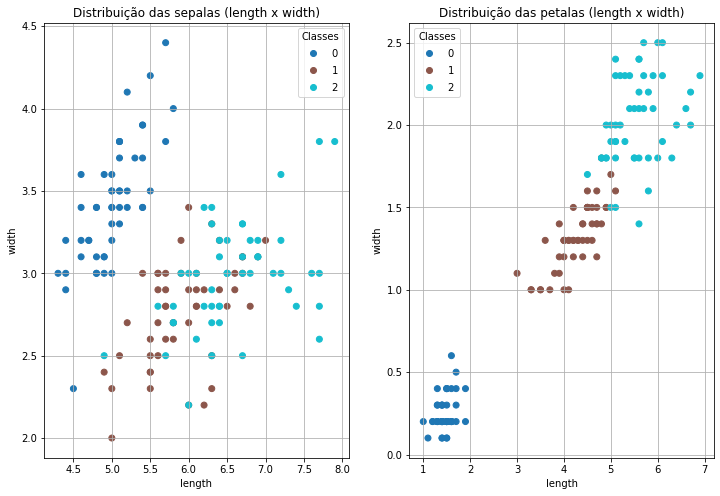

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))

ax[0].set_title("Distribuição das sepalas (length x width)")
scatter0 = ax[0].scatter(df["SEPAL_LENGTH"], df["SEPAL_WIDTH"], c=df["SPECIES"], cmap=plt.get_cmap("tab10"))
ax[0].set_xlabel("length")
ax[0].set_ylabel("width")
ax[0].grid(True)
ax[0].legend(*scatter0.legend_elements(), title="Classes")

ax[1].set_title("Distribuição das petalas (length x width)")
scatter1 = ax[1].scatter(df["PETAL_LENGTH"], df["PETAL_WIDTH"], c=df["SPECIES"], cmap=plt.get_cmap("tab10"))
ax[1].set_xlabel("length")
ax[1].set_ylabel("width")
ax[1].grid(True)
ax[1].legend(*scatter1.legend_elements(), title="Classes")

plt.show()

### Visualizando correlação

In [8]:
df.corr()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
SEPAL_LENGTH,1.000000,-0.117570,0.871754,0.817941
SEPAL_WIDTH,-0.117570,1.000000,-0.428440,-0.366126
PETAL_LENGTH,0.871754,-0.428440,1.000000,0.962865
PETAL_WIDTH,0.817941,-0.366126,0.962865,1.000000


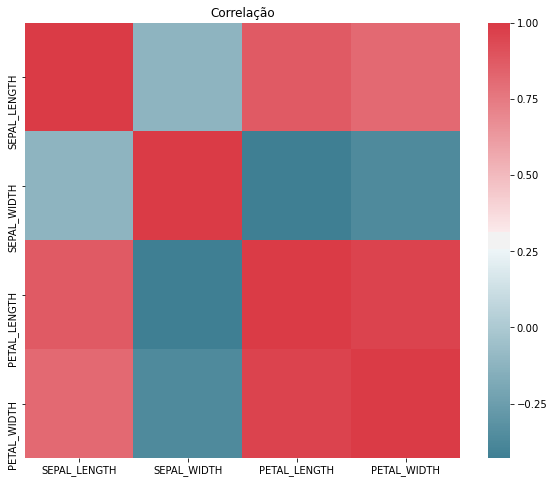

In [10]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
plt.title("Correlação")
sns.heatmap(corr, 
            mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,
            ax=ax)
plt.show()

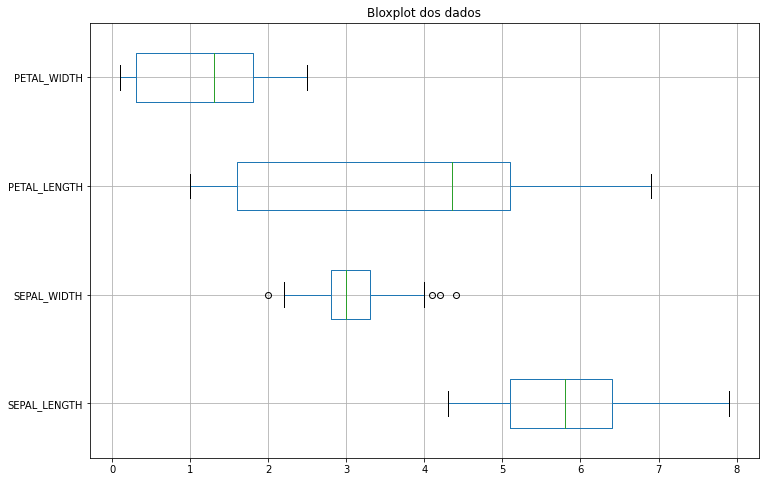

In [32]:
bp = df.boxplot(grid=True, figsize=(12,8), vert=False)

plt.title("Visualizando outliers")
plt.show()